# Background Simulator

Simulate the path from background objects to the camera.

In [1]:
import cupy as cp
import viz_cuda
import results
import simulation
from pyinstrument import Profiler
from pyinstrument.renderers import ConsoleRenderer

import numpy as np
np.set_printoptions(precision=6, linewidth=200)

profiler = Profiler()

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

results = results.BackgroundSimulationResult()
#simulator = simulation.Simulator(results, waves = 40, bundles = 10000000, bundle_size = 1)
#simulator = simulation.Simulator(results, waves = 80, bundles =  5000000, bundle_size = 1)
simulator = simulation.BackgroundSimulator(results, waves =  80, bundles =  5000000, bundle_size = 1)

/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')
/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


mempool.used_bytes 87232512


In [2]:
profiler.reset()
profiler.start()

#simulator.run()
simulator.run_all_waves()

session = profiler.stop()
profile_renderer = ConsoleRenderer(unicode=True, color=True, show_all=True)
print(profile_renderer.render(session))

  0%|          | 0/80 [00:00<?, ?it/s]

before filtering 657
after filtering 53
before filtering 642
after filtering 51
before filtering 637
after filtering 38
before filtering 664
after filtering 52
before filtering 638
after filtering 52
before filtering 612
after filtering 49
before filtering 611
after filtering 48
before filtering 620
after filtering 59
before filtering 646
after filtering 55
before filtering 638
after filtering 55
before filtering 646
after filtering 42
before filtering 635
after filtering 48
before filtering 613
after filtering 47
before filtering 650
after filtering 63
before filtering 670
after filtering 63
before filtering 624
after filtering 65
before filtering 690
after filtering 53
before filtering 631
after filtering 43
before filtering 616
after filtering 34
before filtering 629
after filtering 48
before filtering 569
after filtering 50
before filtering 660
after filtering 58
before filtering 609
after filtering 41
before filtering 647
after filtering 43
before filtering 675
after filtering 56


# Done


  _     ._   __/__   _ _  _  _ _/_   Recorded: 17:30:36  Samples:  9066
 /_//_/// /_\ / //_// / //_'/ //     Duration: 66.916    CPU time: 66.888
/   _/                      v4.2.0

Program: /home/joel/.local/lib/python3.8/site-packages/ipykernel_launcher.py -f /home/joel/.local/share/jupyter/runtime/kernel-0bd04947-074e-4475-b4f4-7184e0f0c537.json

66.915 run_code  IPython/core/interactiveshell.py:3400
└─ 66.915 <module>  <ipython-input-2-9ea745b9c55a>:5
   └─ 66.915 run_all_waves  simulation.py:26
      └─ 66.784 run  simulation.py:94
         ├─ 64.883 record_results  simulation.py:32
         │  ├─ 44.384 histogram  stats_cuda.py:51
         │  │  ├─ 23.246 histogram_4d  stats_cuda.py:300
         │  │  │  └─ 22.882 histogramdd  cupy/_statistics/histogram.py:285
         │  │  │     ├─ 18.123 [self]  
         │  │  │     └─ 4.536 bincount  cupy/_statistics/histogram.py:513
         │  │  │        └─ 4.523 [self]  
         │  │  ├─ 16.810 counter  stats_cuda.py:241
         │  │ 

In [3]:
print(cp.sum(results._source_stage._histogram_4d_count._hist))

399999909.0


# <center> Source

total photons: 6.00e+12
photon bundle count: 4.00e+08
photon total energy (J): 2.25e-06
photon total power (W): 2.25e-03


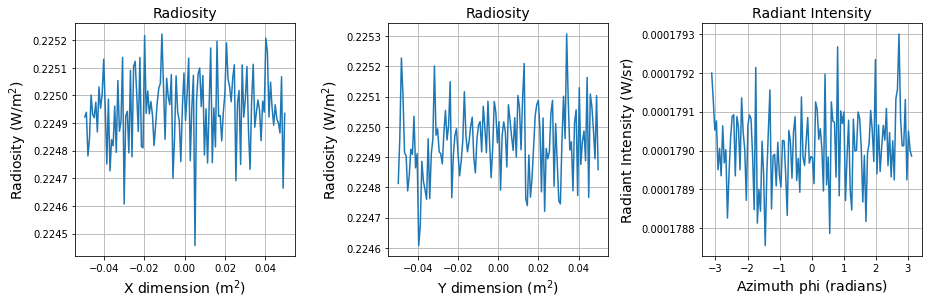

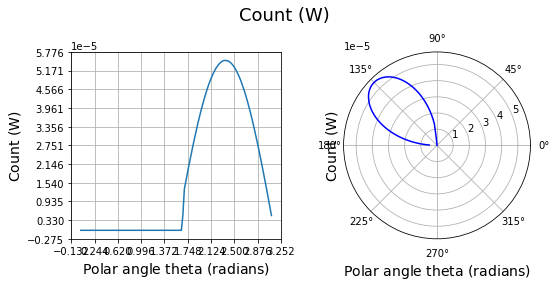

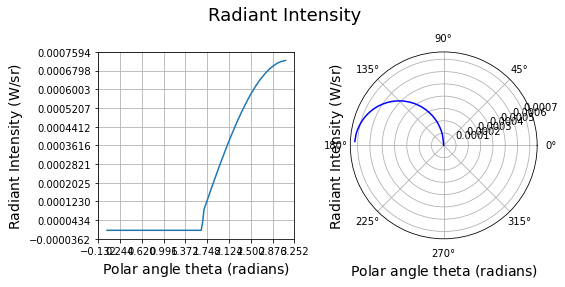

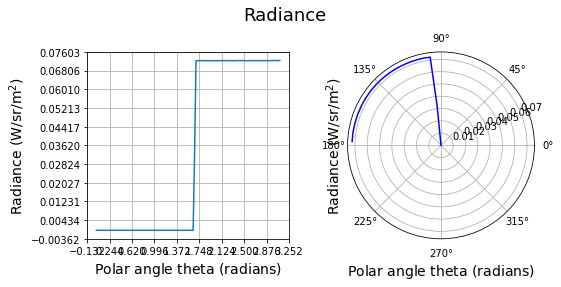

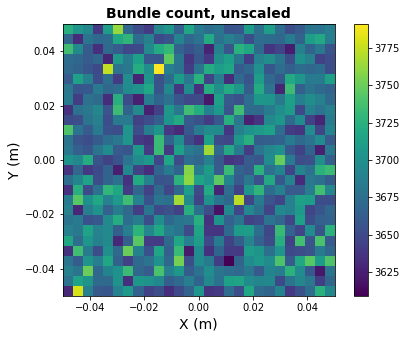

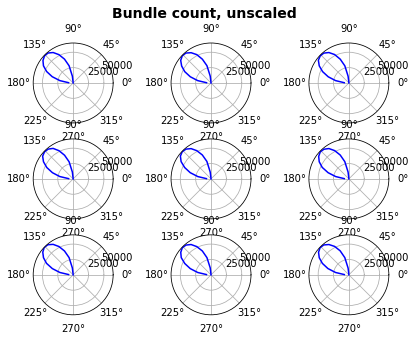

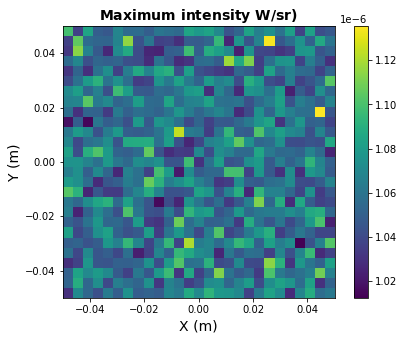

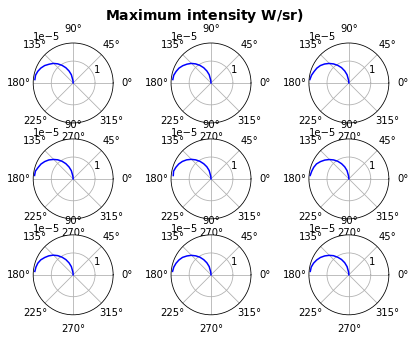

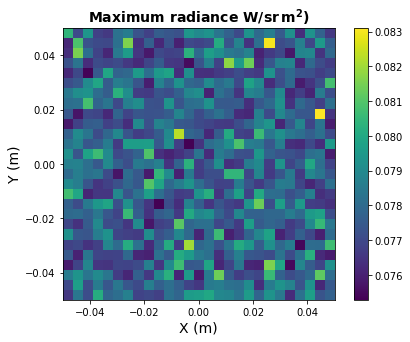

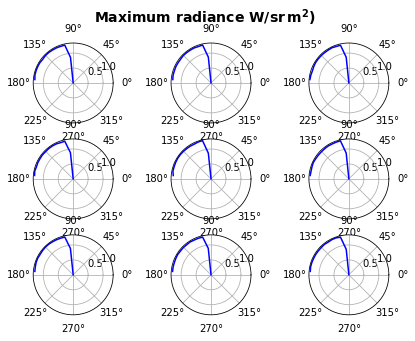

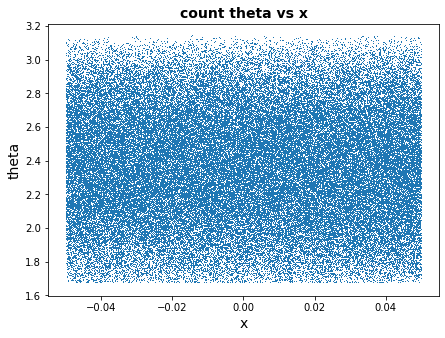

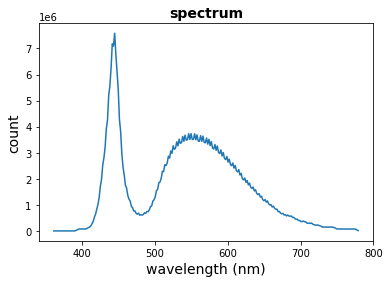

Output()

In [4]:
viz_cuda.summary(results._source_stage)
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stages_3d([results._source_stage])

# <center> Camera Plane

total photons: 7.75e+08
photon bundle count: 5.16e+04
photon total energy (J): 2.91e-10
photon total power (W): 2.91e-07


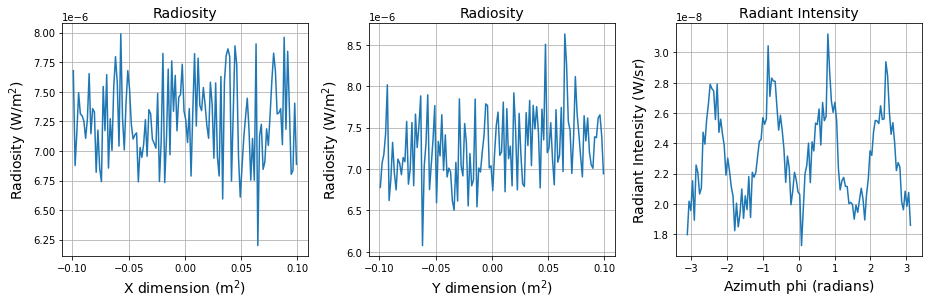

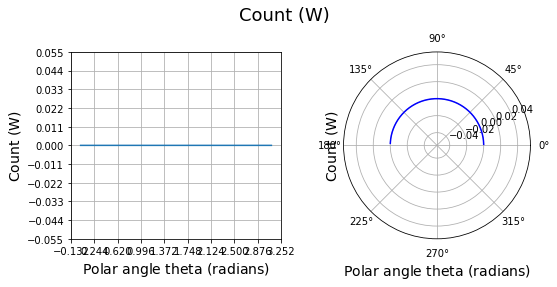

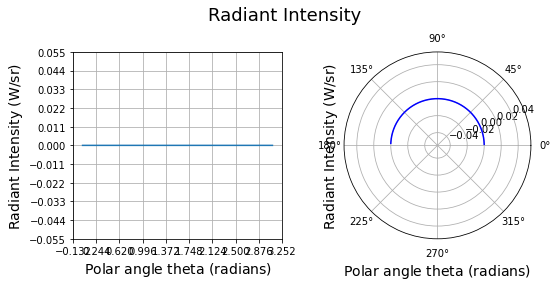

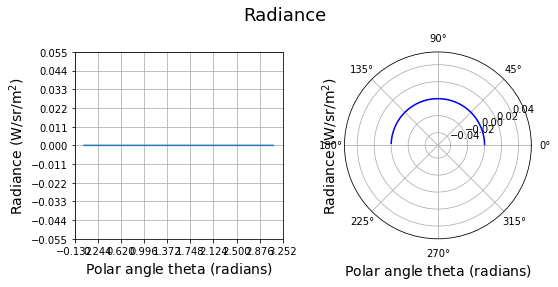

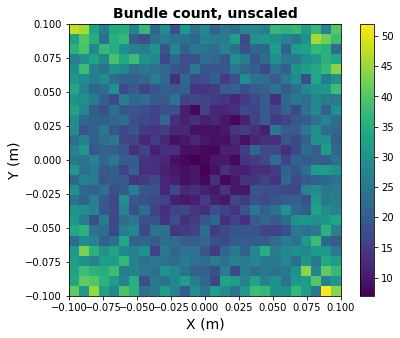

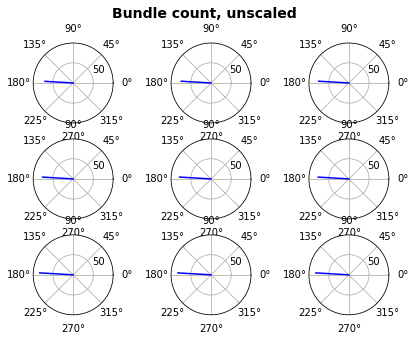

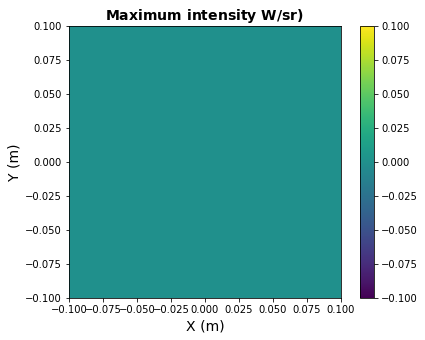

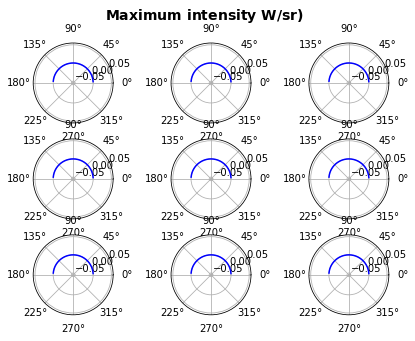

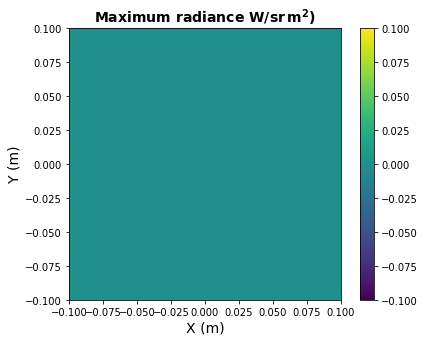

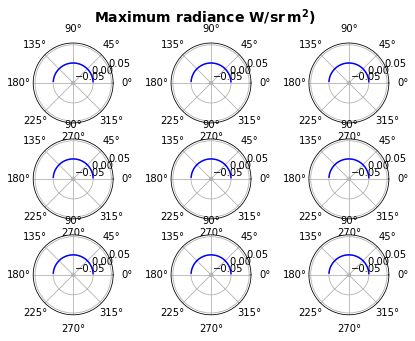

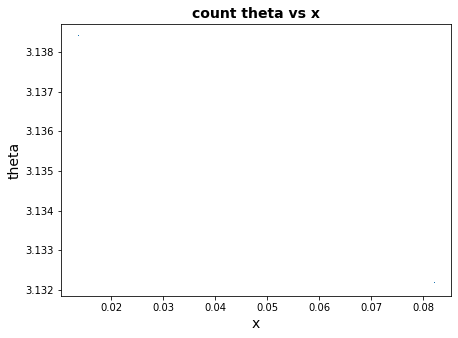

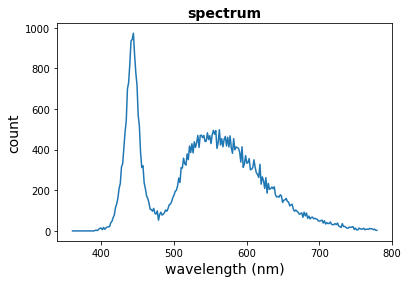

Output()

In [5]:
viz_cuda.summary(results._camera_plane_stage)
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stages_3d([results._camera_plane_stage])

total photons: 6.03e+07
photon bundle count: 4.02e+03
photon total energy (J): 1.79e-11
photon total power (W): 1.79e-08


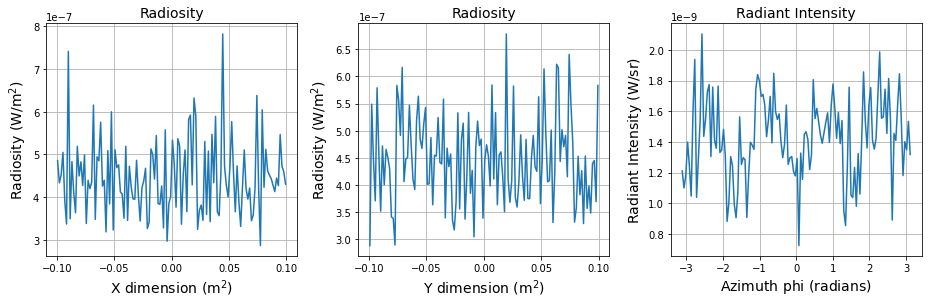

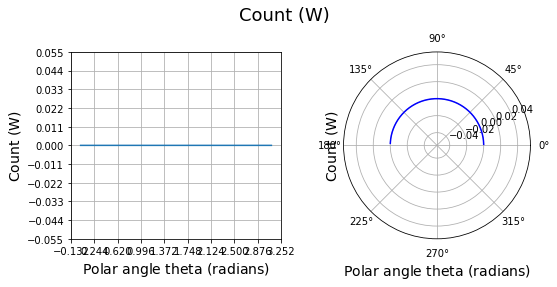

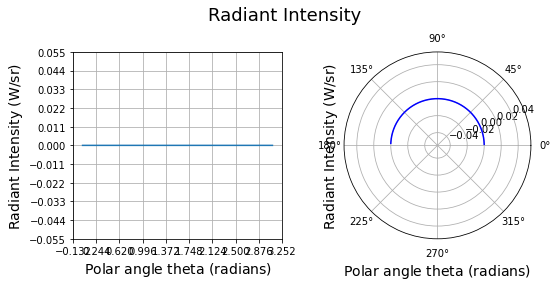

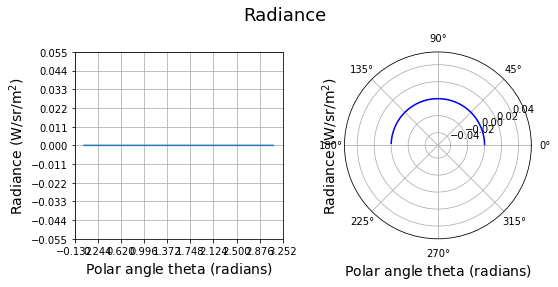

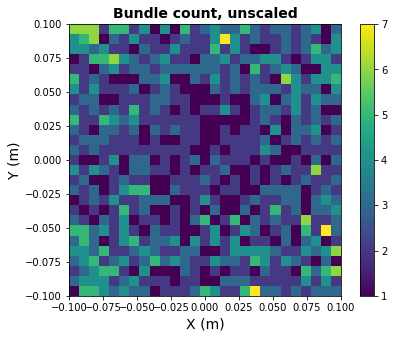

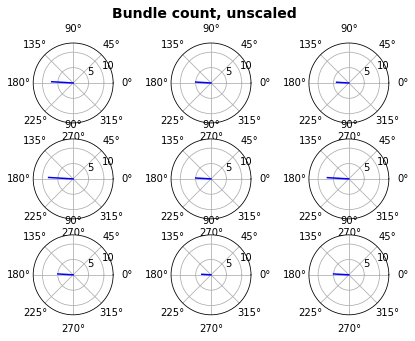

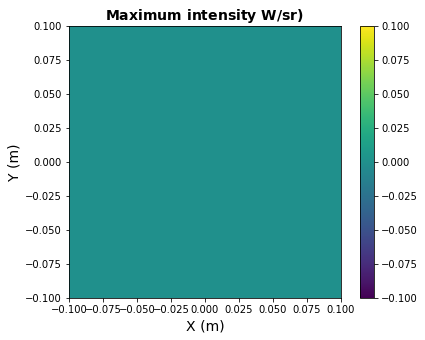

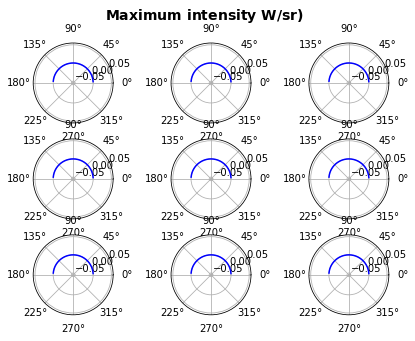

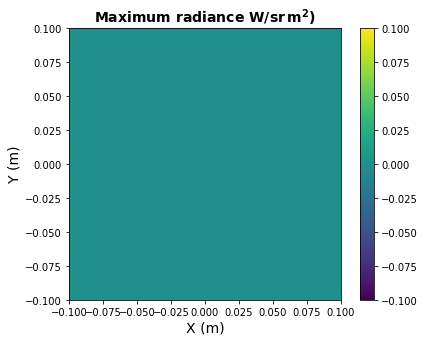

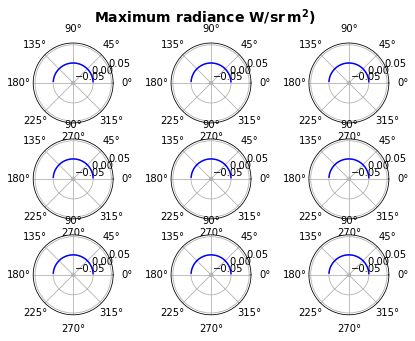

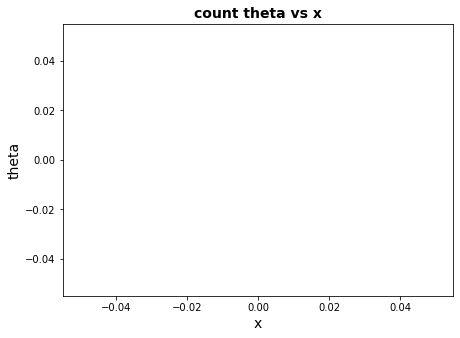

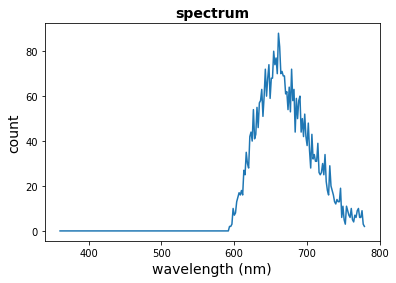

Output()

In [6]:
# after the filter
viz_cuda.summary(results._filter_stage)
viz_cuda.plot_all_histograms(results._filter_stage)
viz_cuda.plot_stages_3d([results._filter_stage])

total photons: 1.20e+05
photon bundle count: 8.00e+00
photon total energy (J): 3.58e-14
photon total power (W): 3.58e-11


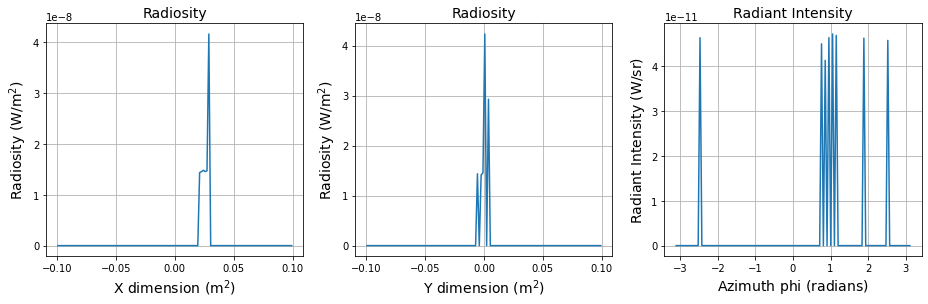

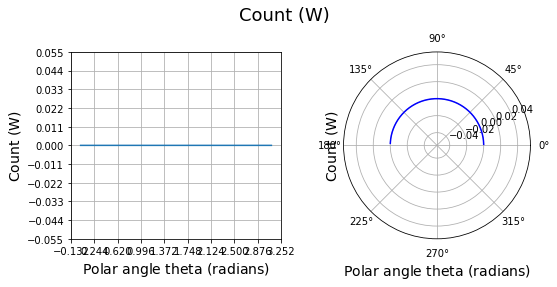

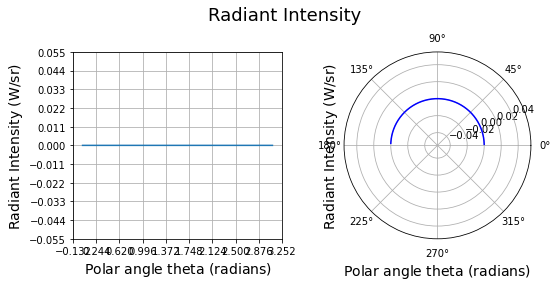

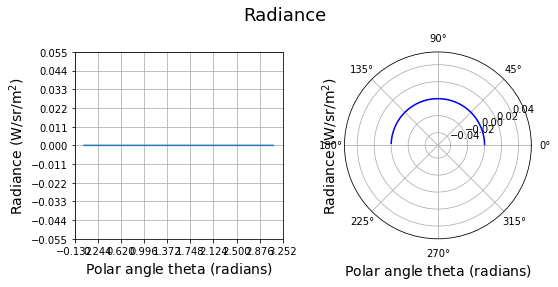

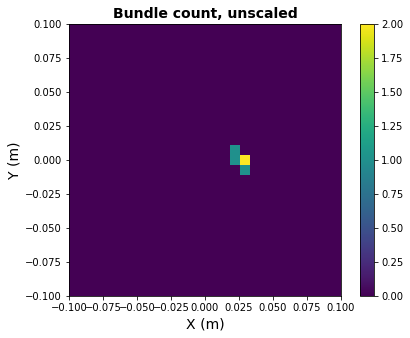

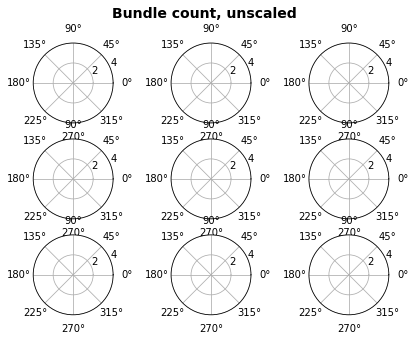

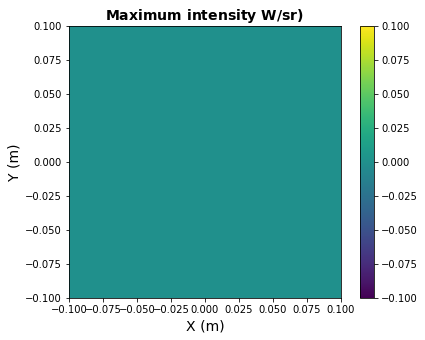

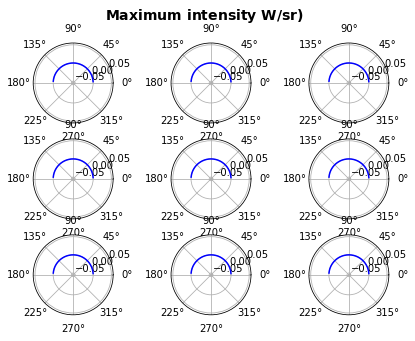

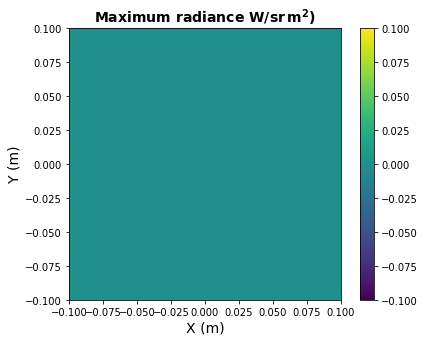

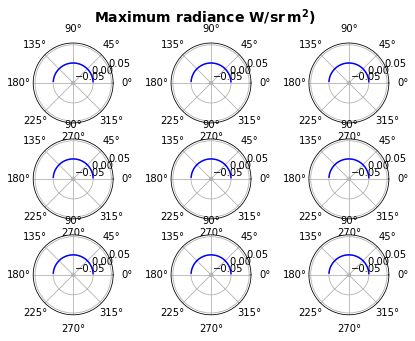

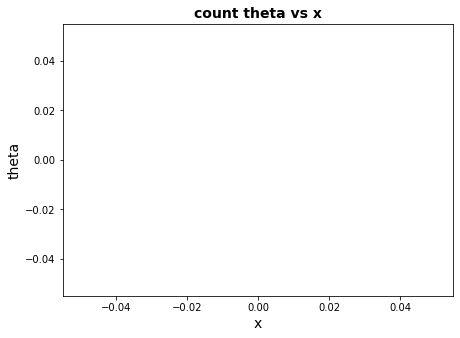

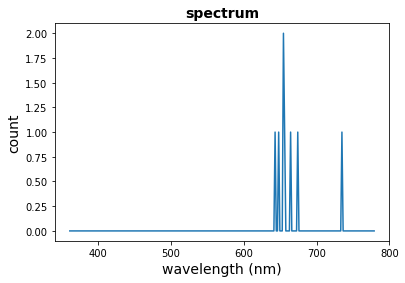

Output()

In [7]:
# same as the camera dimensions
viz_cuda.summary(results._camera_lens_stage)
viz_cuda.plot_all_histograms(results._camera_lens_stage)
viz_cuda.plot_stages_3d([results._camera_lens_stage])

In [8]:
viz_cuda.plot_stages_3d([results._source_stage, results._camera_plane_stage])

Output()

In [9]:
print(f"camera total {simulator._camera._total_photons}")

camera total 120000.0
